In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("medianSalesPrice_All.csv")

In [10]:
df = df.copy()

id_cols = ['areaName', 'Borough', 'areaType']
date_cols = [col for col in df.columns if col not in id_cols]

In [12]:
df = df.dropna(subset=date_cols, thresh=int(len(date_cols) * 0.9))

df[date_cols] = df[date_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

assert df[date_cols].isna().sum().sum() == 0, "There are still NaN values in the dataset."

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[date_cols])

/var/folders/2c/cc0cm1694pd3m6yz9k_3l5xc0000gn/T/ipykernel_36575/1213709371.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[date_cols] = df[date_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)


In [14]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

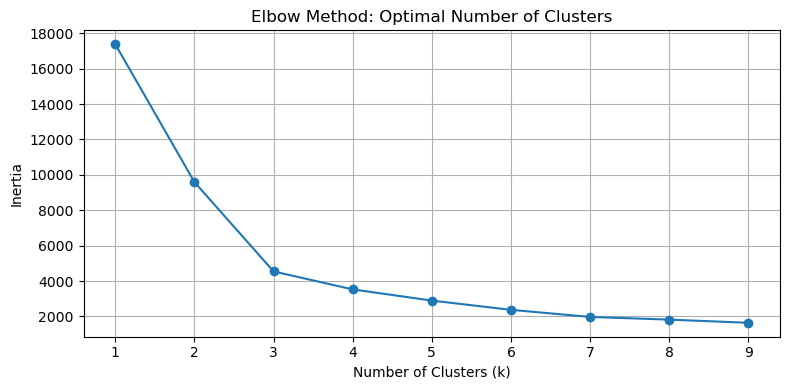

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

/var/folders/2c/cc0cm1694pd3m6yz9k_3l5xc0000gn/T/ipykernel_36575/3505841337.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = kmeans.fit_predict(scaled_data)


In [20]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

/var/folders/2c/cc0cm1694pd3m6yz9k_3l5xc0000gn/T/ipykernel_36575/3607173686.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['PCA1'] = pca_result[:, 0]
/var/folders/2c/cc0cm1694pd3m6yz9k_3l5xc0000gn/T/ipykernel_36575/3607173686.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['PCA2'] = pca_result[:, 1]


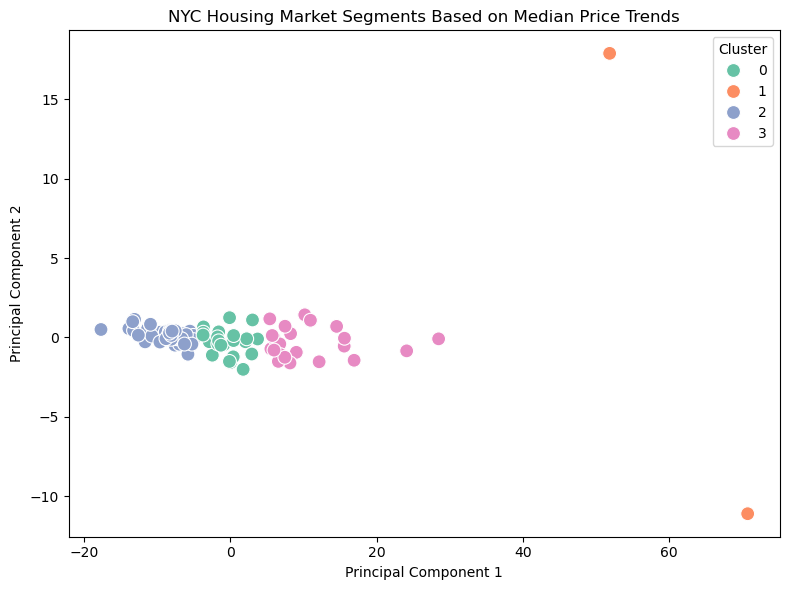

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("NYC Housing Market Segments Based on Median Price Trends")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()